In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Assignment 03: Linear Regression from scratch.

### Linear regression class for easy instance creation with different datasets, performing computations.

In [2]:
class LinearRegression:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.compute()
        
    def compute(self):
        mean_x = np.mean(self.x)
        mean_y = np.mean(self.y)
        #print(mean_x, mean_y)
        n = np.size(self.x)
        cov_xy = 0.0
        var_xy = 0.0
        
        for i in range(n):
            cov_xy += (self.x[i] - mean_x) * (self.y[i] - mean_y)
            var_xy += (self.x[i] - mean_x) ** 2
        
        #print(cov_xy, var_xy)
        self.b1 = cov_xy / var_xy
        self.b0 = mean_y - (self.b1 * mean_x)
        #print(self.b0, self.b1)
        
    def predict(self, x):
        y_pred = self.b0 + (self.b1 * x)
        return y_pred
    
    def plot(self):
        y = self.b0 + self.b1 * self.x
        plt.scatter(self.x, self.y, color='black', s = 15)
        plt.plot(self.x, y, color='red', linewidth=2)
        plt.title('Linear Regression Fit')
        plt.xlabel('x values')
        plt.ylabel('y values')
        plt.show()

### a) Random data generation.

In [3]:
x = np.random.rand(100, 1) #generates random numbers 100X1 shape
y = 10 + 6.9*x + np.random.rand(100, 1) #Select an equation and add randomness

### Dataset scatter plot.

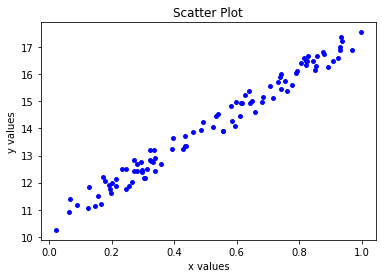

In [4]:
plt.scatter(x, y, color='blue', s = 15)
plt.title('Scatter Plot')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

### Creating an instance of Linear Regression class and passing in the above generated datasets.

In [5]:
Linear1 = LinearRegression(x, y)

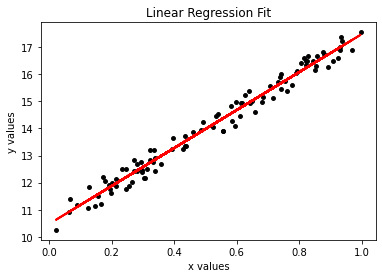

In [6]:
Linear1.plot()

### Predicting a y value based on x input.

In [7]:
input = 5
print(Linear1.predict(input))

[45.53693203]


### b) Loading data from CSV and performing linear regression.

In [8]:
data = pd.read_csv("Yield_vs_Temperature.csv")

In [9]:
data.head()

,Observation Number,Temperature (Xi),Yield (Yi)
0,1,50,122
1,2,53,118
2,3,54,128
3,4,55,121
4,5,56,125


In [10]:
data.shape

(25, 3)

In [11]:
data_x = data['Temperature (Xi)']

In [12]:
data_y = data['Yield (Yi)']

### Passing the features and target to the Linear Regression class and creating its instance.

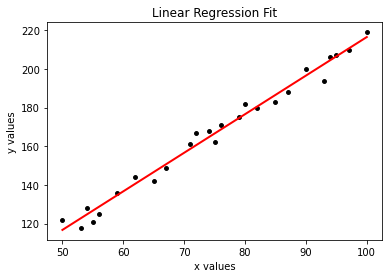

In [13]:
Linear2 = LinearRegression(data_x, data_y)
Linear2.plot()

### Performing prediction.

In [14]:
Linear2.predict(70)

156.66338460671625

# Assignment 04: Linear Regression using SK Learn.

### Importing necessary modules.

In [15]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import math

## A) Happiness dataset 2015. 

### Problem Statement:
### Univariate linear regression: To find out the effect of GDP on the happiness score of a country and predict the happiness score for a given GDP input.
### Multivariate linear regression: To find out the effect of multiple attributes such as GDP, Family, Health, Freedom, Trust on government, Generosity and Dystopia residual on the happiness score of a country and predict the happiness score for a given input values. 

Happiness dataset was a separate folder with different year files in that. I have thus kept the directory like that only when loading the dataset below i.e. happiness/2015.csv .

In [16]:
happy1 = pd.read_csv("happiness/2015.csv")

In [17]:
happy1.shape

(158, 12)

In [18]:
happy1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [19]:
happy1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

### Univariate

In [20]:
X = happy1['Economy (GDP per Capita)'].values.reshape(-1, 1)

In [21]:
Y = happy1['Happiness Score'].values.reshape(-1, 1)

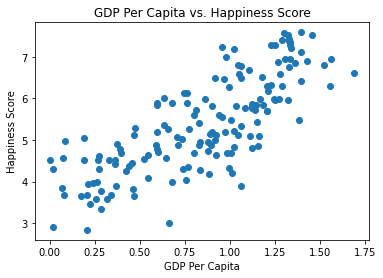

In [22]:
plt.scatter(X, Y)
plt.title('GDP Per Capita vs. Happiness Score')
plt.xlabel('GDP Per Capita')
plt.ylabel('Happiness Score')
plt.show()

Splitting into training and testing set.

In [23]:
x_training, x_test, y_training, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 40)

In [24]:
regr = linear_model.LinearRegression()
regr.fit(x_training, y_training)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [3.50472628]
Coefficients: 
 [[2.2661715]]


In [25]:
y_pred = regr.predict(x_test)

Text(0, 0.5, 'Happiness Score')

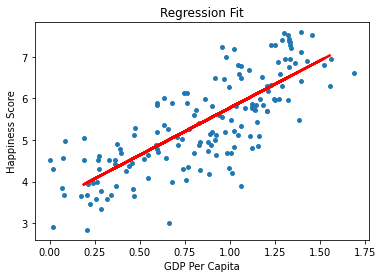

In [26]:
plt.scatter(X, Y, s =15)
plt.plot(x_test, y_pred, linewidth = 2.5, color = 'red')
plt.title('Regression Fit')
plt.xlabel('GDP Per Capita')
plt.ylabel('Happiness Score')

In [27]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

Mean squared error: 0.61


In [28]:
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

Coefficient of determination: 0.49


Performing prediction.

In [29]:
print('Predicted Happiness Score for GDP:\n')
regr.predict([[1.4]])

Predicted Happiness Score for GDP:



array([[6.67736638]])

### Multivariate

### Plotting Co-relations.

array([[<AxesSubplot:xlabel='Happiness Score', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Family', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>,
        <AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>],
       [<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>,
        <AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Economy (GDP per Capita)'>,
        <AxesSubplot:xlabel='Family', ylabel='Economy (GDP per Capita)'>,
        <AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Economy (GDP per Capita)'>,
        <AxesSubplot:xlabel='Freedom', ylabel='Economy

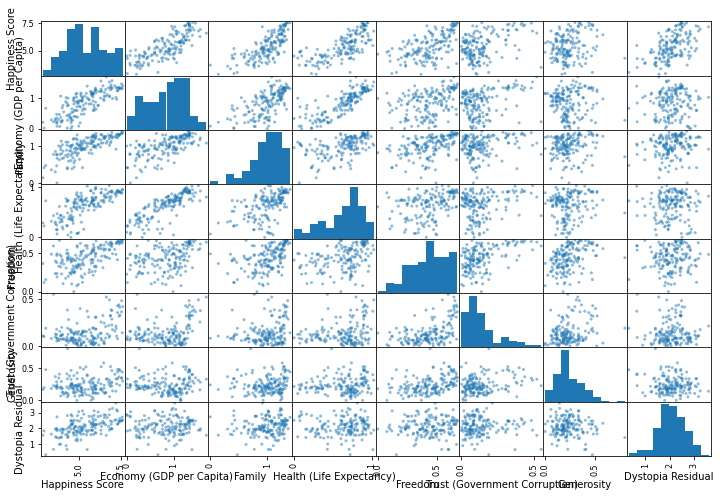

In [30]:
from pandas.plotting import scatter_matrix
attributes = ["Happiness Score", "Economy (GDP per Capita)","Family","Health (Life Expectancy)", "Freedom","Trust (Government Corruption)", "Generosity", "Dystopia Residual"]
scatter_matrix(happy1[attributes], figsize=(12, 8))

### Setting features and target, performing linear regression.

In [31]:
X = happy1[happy1.drop(['Happiness Score', 'Country', 'Region', 'Happiness Rank', 'Standard Error', ], axis = 1).columns]
print(X.columns)

Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')


In [32]:
Y = happy1['Happiness Score']

In [33]:
# print(Y)
# print(len(Y))

In [34]:
len(X), len(Y)

(158, 158)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 40)

In [36]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.00014161846153726287
Coefficients: 
 [1.00006353 1.00005334 0.99983383 0.99962612 1.00003546 0.99994571
 1.00000954]


In [37]:
y_pred = regr.predict(x_test)

### Making Prediction.

In [38]:
new_GDP = 1.4
new_family = 1.3
new_health = 0.9
new_freedom = 0.65
new_trust = 0.4
new_gen = 0.3
new_dystopia = 2.4

regr.predict([[new_GDP, new_family, new_health, new_freedom, new_trust, new_gen, new_dystopia]])

array([7.34992812])

In [39]:
mean_squared_error(y_test, y_pred)

9.949238047181714e-08

In [40]:
r2_score(y_test, y_pred)

0.999999916981469

### We observe that in case of happiness dataset, the multivariate linear regression has resulted in a better prediction than the univariate linear regression.

### ------- 

### B) Student dataset:

### Problem Statement:
###  To find out the effect of weakly alcohol consumption, daily alcohol consumption and health on the student grades and thus predict the average grades for given input values.

In [41]:
student_math = pd.read_csv("student_alcohol_consumption_maths_marks.csv")

In [42]:
student_math.shape

(395, 33)

In [43]:
student_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [44]:
student_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Creating a new column for average grades.

In [45]:
student_math['G_avg'] = (student_math['G1'] + student_math['G2'] + student_math['G3']) / 3
student_math['G_avg']

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Name: G_avg, Length: 395, dtype: float64

### Plotting co-relations.

<Figure size 1152x576 with 0 Axes>

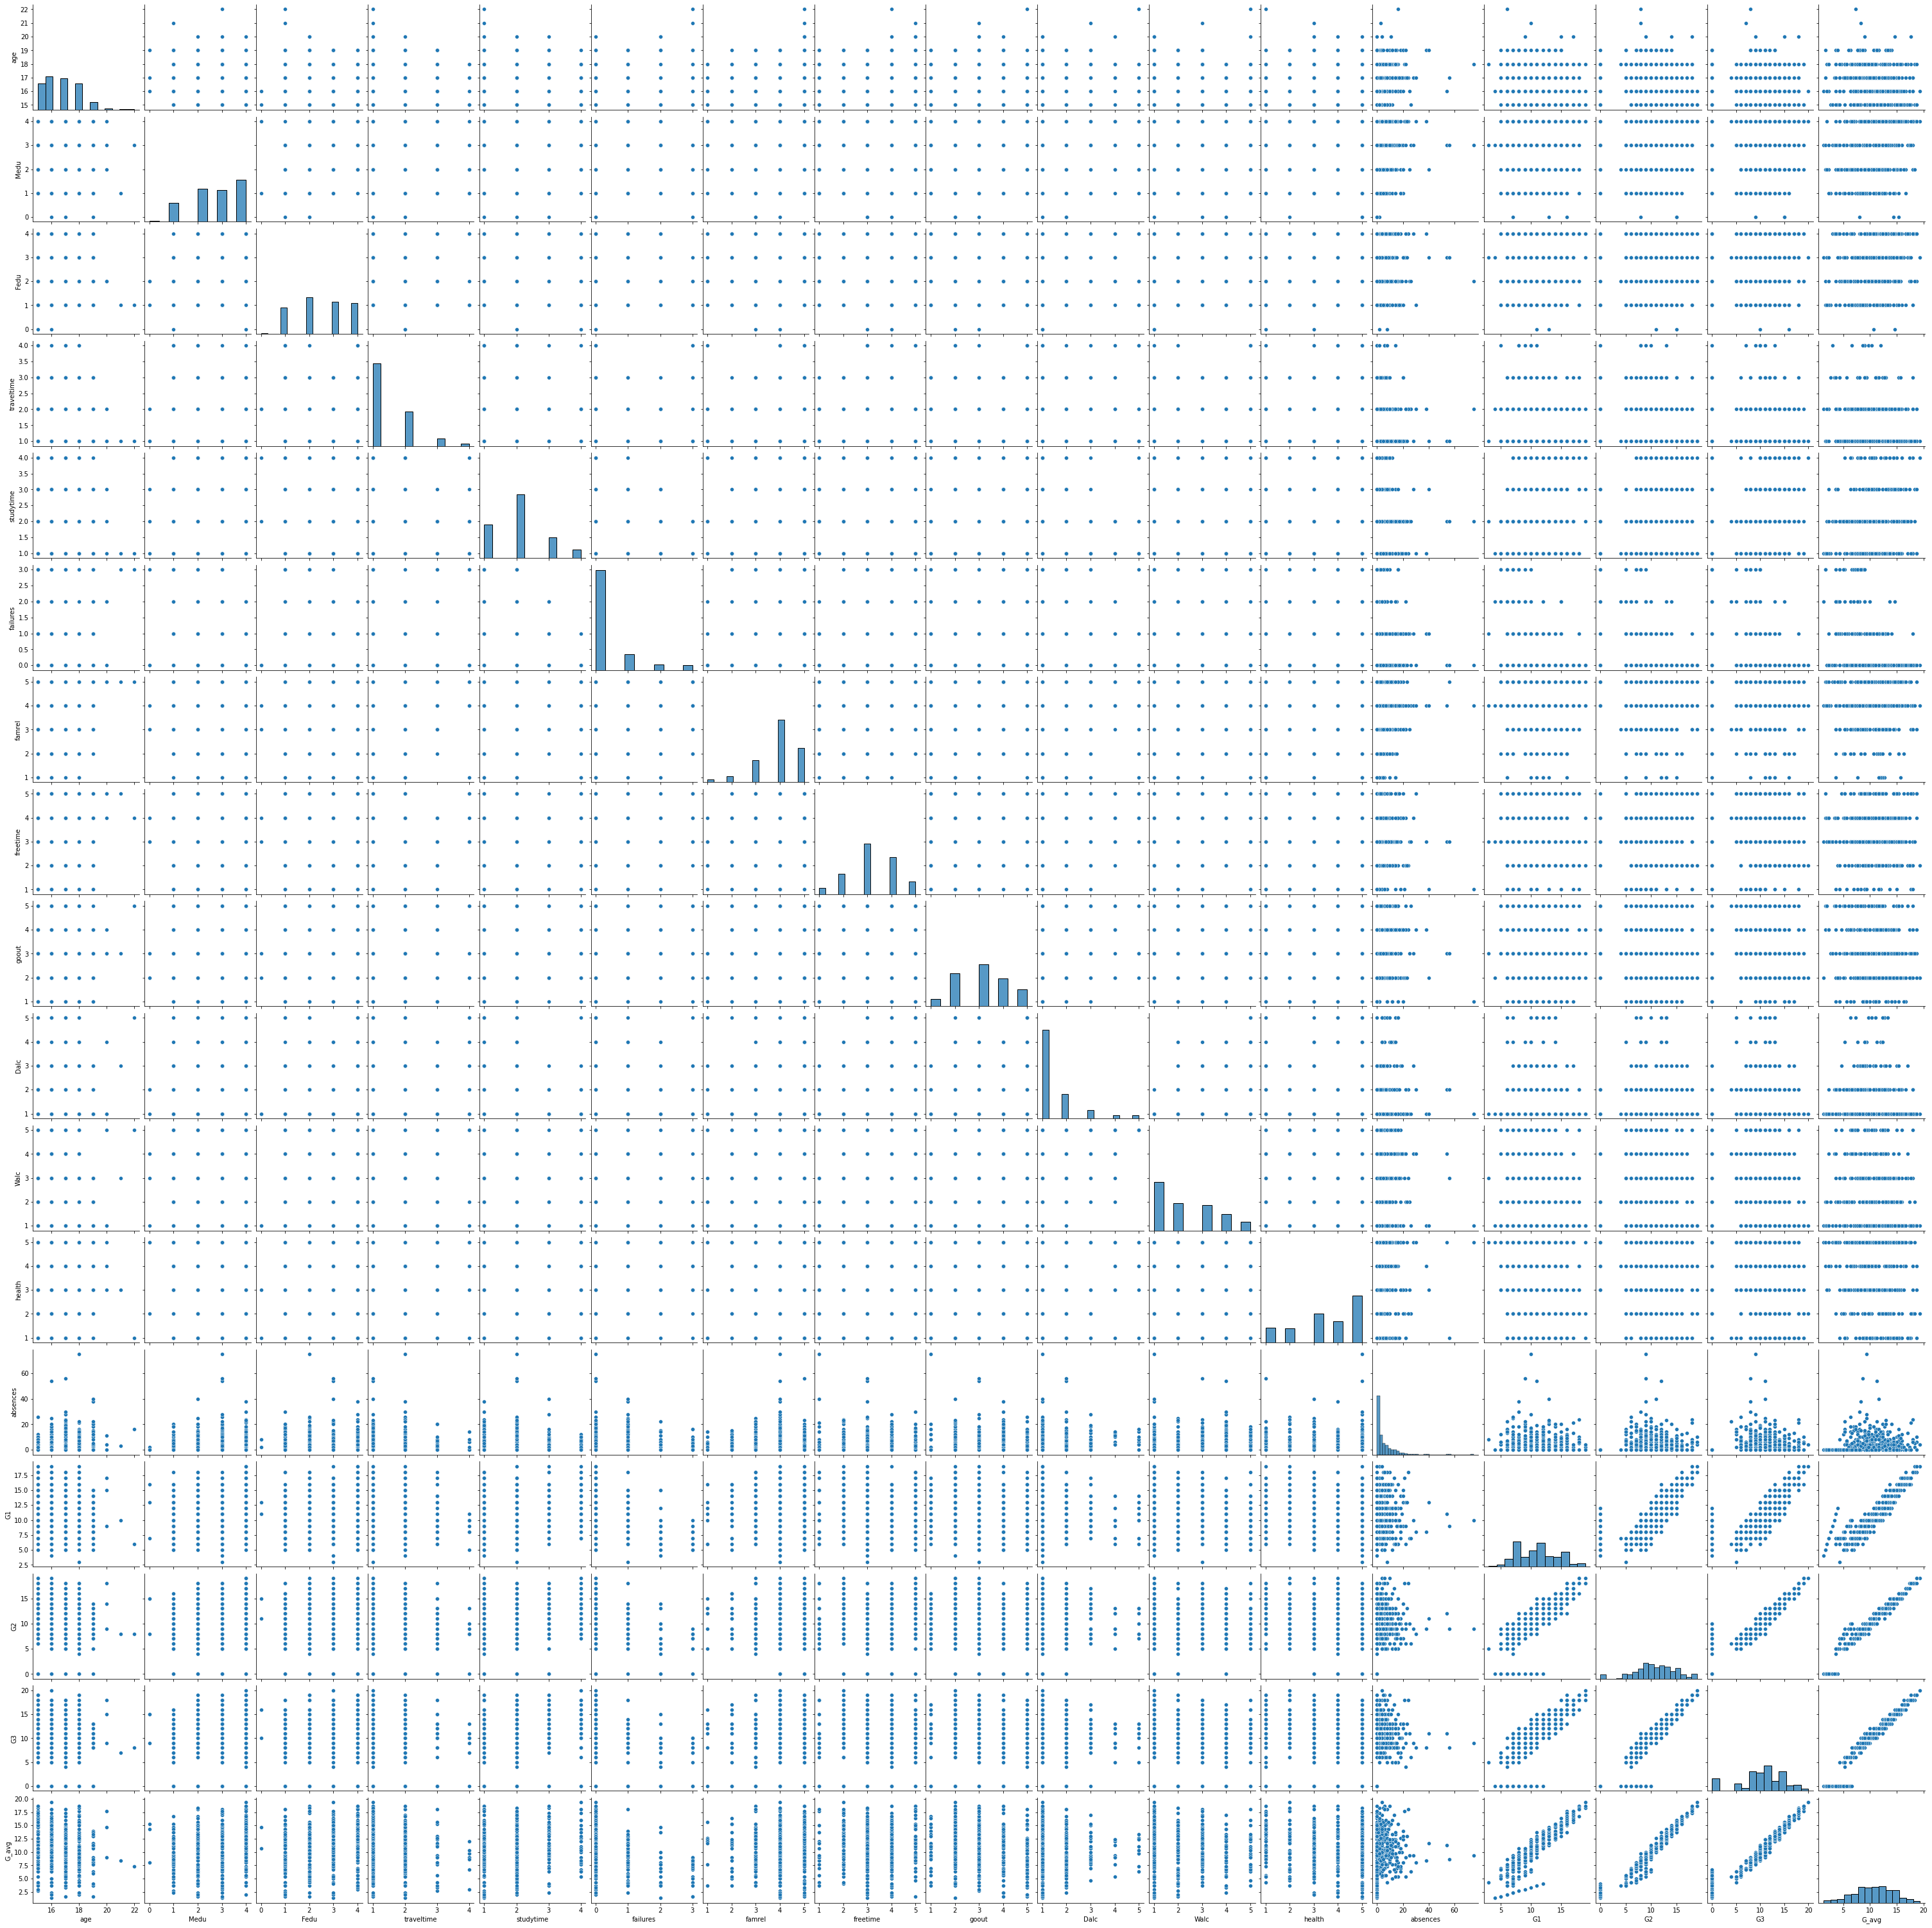

In [64]:
plt.figure(figsize = (16, 8))
sns.pairplot(student_math)

array([[<AxesSubplot:xlabel='G_avg', ylabel='G_avg'>,
        <AxesSubplot:xlabel='age', ylabel='G_avg'>,
        <AxesSubplot:xlabel='Dalc', ylabel='G_avg'>,
        <AxesSubplot:xlabel='Walc', ylabel='G_avg'>,
        <AxesSubplot:xlabel='health', ylabel='G_avg'>],
       [<AxesSubplot:xlabel='G_avg', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='Dalc', ylabel='age'>,
        <AxesSubplot:xlabel='Walc', ylabel='age'>,
        <AxesSubplot:xlabel='health', ylabel='age'>],
       [<AxesSubplot:xlabel='G_avg', ylabel='Dalc'>,
        <AxesSubplot:xlabel='age', ylabel='Dalc'>,
        <AxesSubplot:xlabel='Dalc', ylabel='Dalc'>,
        <AxesSubplot:xlabel='Walc', ylabel='Dalc'>,
        <AxesSubplot:xlabel='health', ylabel='Dalc'>],
       [<AxesSubplot:xlabel='G_avg', ylabel='Walc'>,
        <AxesSubplot:xlabel='age', ylabel='Walc'>,
        <AxesSubplot:xlabel='Dalc', ylabel='Walc'>,
        <AxesSubplot:xlabel='Walc', ylabel='Walc'>,
   

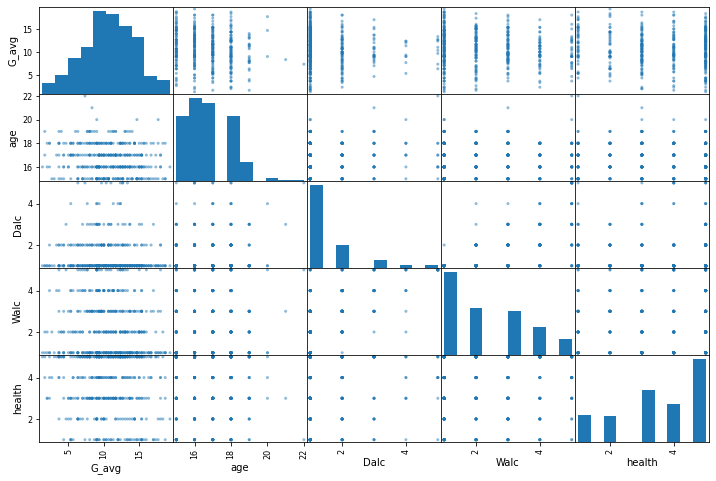

In [56]:
from pandas.plotting import scatter_matrix
attributes = ["G_avg", "age","famsize","Dalc", "Walc","health"]
scatter_matrix(student_math[attributes], figsize=(12, 8))

### Attributes are not good candidates for Linear Regression. 
#### Performing Linear Regression.

### Feature and target selection.

In [57]:
x_value = student_math[['Dalc', 'Walc', 'health']]
y_value = student_math['G_avg']

### Splitting data into training and test set.

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size = 0.25, random_state = 0)

In [59]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 11.560017381878922
Coefficients: 
 [-0.15349099 -0.12616548 -0.09036881]


In [60]:
y_pred = regr.predict(x_test)

In [61]:
mean_squared_error(y_test, y_pred)

16.322801491031708

In [62]:
r2_score(y_test, y_pred)

0.019094648401524417

In [63]:
regr.predict([[1, 1, 3]])

array([11.00925447])

### As seen in the pre-analysis,  the dataset is not a good candidate for Linear Regression and has thus shown a poor output with low accuracy and a high error.